In [2]:
# %pip install scipy --upgrade
# %pip install statsmodels
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
from statsmodels.stats import moment_helpers as smh
import numpy as np
import pandas as pd

# **Processing Time (Example 3.8 in page 130)**

In [3]:
stats.norm.cdf(180,225,1525**0.5)

0.12459235263074858

In [4]:
stats.norm.ppf(0.95,225,1525**0.5)

289.2335875340581

In [5]:
S=10000
np.random.seed(5566)

#Parameters of time for underwriting
mu1=150
sig1=30
#Parameters of time for rating
mu2=75
sig2=25

In [6]:
Time1=np.random.normal(mu1,sig1,S)
Time2=np.random.normal(mu2,sig2,S)

TotTime=Time1+Time2

print(np.sum(TotTime<=180)/S)
#What is the theoretical probability

print(np.quantile(TotTime,0.95))
#What is the theoretical percentile value?

0.1211
289.66571028063817


In [8]:
#Random processing time of cases 1-3 for underwriting
Time11=np.random.normal(mu1,sig1,S)
Time12=np.random.normal(mu1,sig1,S)
Time13=np.random.normal(mu1,sig1,S)
#Random processing time of cases 1-3 for rating
Time21=np.random.normal(mu2,sig2,S)
Time22=np.random.normal(mu2,sig2,S)
Time23=np.random.normal(mu2,sig2,S)

In [9]:
##Assuming rating must wait for undeㄢrwriting!
#Beginning time for the 2nd case of rating
BeginTime22=np.empty(S)
for s in range(0,S):
  BeginTime22[s]=max(Time11[s]+Time21[s],Time11[s]+Time12[s])


#Beginning time for the 3rd case of rating
BeginTime23=np.empty(S)
for s in range(0,S):
  BeginTime23[s]=max(Time11[s]+Time12[s]+Time13[s],
            BeginTime22[s]+Time22[s])

In [10]:
#Ending time for the 3rd case of rating
EndTime=BeginTime23+Time23

stats.describe(EndTime)

DescribeResult(nobs=10000, minmax=(295.6466559600886, 764.652989022996), mean=525.1769456524879, variance=3353.648660552541, skewness=0.001862366920517843, kurtosis=0.033785024506585604)

In [11]:
np.sum(EndTime<=480)/S

0.2153

# **Stochastic Dependencies**

In [12]:
##Assuming X & Y are NOT independent of each other
corrXY=0.37
SigmaXY=np.array([[sig1*sig1,sig1*sig2*corrXY],
        [sig1*sig2*corrXY,sig2*sig2]])
SigmaXY

array([[900. , 277.5],
       [277.5, 625. ]])

In [13]:
xy=np.random.multivariate_normal([mu1,mu2],SigmaXY,S)
print(xy.shape)
np.corrcoef([xy[:,0],xy[:,1]])

(10000, 2)


array([[1.        , 0.36269243],
       [0.36269243, 1.        ]])

In [14]:
Time1corr=np.random.multivariate_normal([mu1,mu2],SigmaXY,S)
Time2corr=np.random.multivariate_normal([mu1,mu2],SigmaXY,S)
Time3corr=np.random.multivariate_normal([mu1,mu2],SigmaXY,S)
#Random processing time of cases 1-3 for underwriting
Time11corr=Time1corr[:,0]
Time12corr=Time2corr[:,0]
Time13corr=Time3corr[:,0]
#Random processing time of cases 1-3 for rating
Time21corr=Time1corr[:,1]
Time22corr=Time2corr[:,1]
Time23corr=Time3corr[:,1]

In [15]:
##Assuming rating must wait for underwriting!
#Beginning time for the 2nd case of rating
BeginTime22corr=np.empty(S)
for s in range(0,S):
  BeginTime22corr[s]=max(Time11corr[s]+Time21corr[s],
              Time11corr[s]+Time12corr[s])


#Beginning time for the 3rd case of rating
BeginTime23corr=np.empty(S)
for s in range(0,S):
  BeginTime23corr[s]=max(Time11corr[s]+Time12corr[s]+Time13corr[s],
             BeginTime22corr[s]+Time22corr[s])

In [16]:
#Ending time for the 3rd case of rating
EndTimecorr=BeginTime23corr+Time23corr

stats.describe(EndTimecorr)

DescribeResult(nobs=10000, minmax=(277.43376680453196, 755.9375483102365), mean=525.1862376443795, variance=3837.6552037514884, skewness=0.004626875230024665, kurtosis=-0.03192759298033376)

In [17]:
np.sum(EndTimecorr<=480)/S

0.2359

In [18]:
TotTime1corr=Time11corr+Time21corr

print(np.sum(TotTime1corr<=180)/S)
#What is the theoretical probability

print(np.quantile(TotTime1corr,0.95))
#What is the theoretical percentile value?


0.1576
299.4435173964134


# **Correlations/Covariances from Data**

In [19]:
Fund1=[65, 79, 85, 78, 107, 108, 124, 156, 195, 181, 216]
Fund2=[47, 61, 73, 60, 89, 86, 104, 120, 140, 134, 175]
Fund3=[38, 37, 39, 40, 47, 46, 57, 71, 74, 72, 87]
Fund4=[61, 64, 74, 72, 95, 89, 114, 147, 146, 127, 152]

In [20]:
len(Fund1)

11

In [21]:
#CompY growth
AnnualGR=np.empty([4,(len(Fund1)-1)])

for i in range(1,len(Fund1)):
  AnnualGR[0,i-1]=Fund1[i]/Fund1[i-1]
  AnnualGR[1,i-1]=Fund2[i]/Fund2[i-1]
  AnnualGR[2,i-1]=Fund3[i]/Fund3[i-1]
  AnnualGR[3,i-1]=Fund4[i]/Fund4[i-1]

print(AnnualGR)

[[1.21538462 1.07594937 0.91764706 1.37179487 1.00934579 1.14814815
  1.25806452 1.25       0.92820513 1.19337017]
 [1.29787234 1.19672131 0.82191781 1.48333333 0.96629213 1.20930233
  1.15384615 1.16666667 0.95714286 1.30597015]
 [0.97368421 1.05405405 1.02564103 1.175      0.9787234  1.23913043
  1.24561404 1.04225352 0.97297297 1.20833333]
 [1.04918033 1.15625    0.97297297 1.31944444 0.93684211 1.28089888
  1.28947368 0.99319728 0.86986301 1.19685039]]


In [22]:
#Compute covariance matrix
Sigmahat=np.round(np.cov(AnnualGR),3)
print(Sigmahat)

[[0.023 0.026 0.01  0.018]
 [0.026 0.038 0.011 0.023]
 [0.01  0.011 0.013 0.017]
 [0.018 0.023 0.017 0.027]]


In [23]:
#Compute correlation matrix
np.round(smh.cov2corr(Sigmahat),3)

array([[1.   , 0.879, 0.578, 0.722],
       [0.879, 1.   , 0.495, 0.718],
       [0.578, 0.495, 1.   , 0.907],
       [0.722, 0.718, 0.907, 1.   ]])

In [24]:
S=50
np.random.seed(9527)
Muhat=[np.mean(AnnualGR[0,]),np.mean(AnnualGR[1,]),
   np.mean(AnnualGR[2,]),np.mean(AnnualGR[3,])]
SimAnnualGR=np.random.multivariate_normal(Muhat,Sigmahat, S)
SimAnnualGR[0:14,]


array([[1.24786062, 1.07981398, 1.27035866, 1.3233342 ],
       [1.00554531, 1.02035648, 1.02234712, 1.0781537 ],
       [0.89935048, 0.85630697, 0.90691367, 0.85280527],
       [1.18715913, 1.09898478, 1.01876002, 1.00332615],
       [1.0990072 , 1.0656728 , 1.16846856, 1.13775223],
       [1.22387265, 1.32161147, 1.30348344, 1.30918223],
       [1.32213495, 1.4641117 , 1.21218129, 1.30106707],
       [1.17181706, 1.1295301 , 1.10143696, 1.05431478],
       [1.16034545, 1.22729252, 1.14733859, 1.23773347],
       [1.39196279, 1.42233438, 1.31433044, 1.32514017],
       [1.00000608, 0.92568419, 0.9464966 , 0.83265658],
       [1.08384845, 1.08197918, 0.94355399, 0.89701813],
       [1.16737114, 1.23091426, 1.29742153, 1.35523524],
       [1.19974848, 1.2694047 , 1.33694951, 1.40885406]])

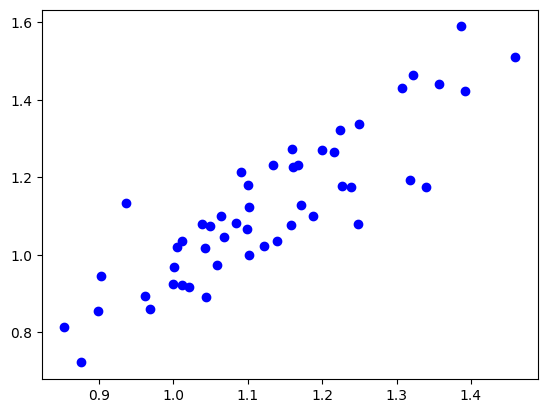

In [25]:
Fund1MVN=SimAnnualGR[:,0]
Fund2MVN=SimAnnualGR[:,1]

plt.scatter(Fund1MVN, Fund2MVN, c ="blue")
plt.show()

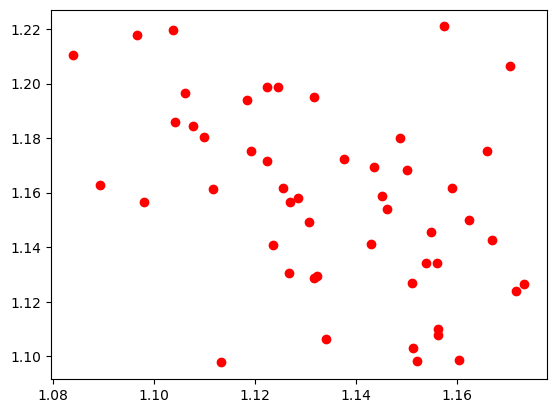

In [26]:
#Ignore dependencies
Fund1N=np.random.normal(Muhat[0],Sigmahat[0,0],S)
Fund2N=np.random.normal(Muhat[1],Sigmahat[1,1],S)

plt.scatter(Fund1N, Fund2N, c ="red")
plt.show()

# **The Hedging Problem**

In [27]:
# DM put options
putDM = pd.DataFrame({'kDM': [0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.60, 0.59, 0.55],
                        'cDM': [0.085855, 0.032191, 0.020795, 0.017001, 0.013711, 0.010851, 0.008388, 0.006291, 0.001401]})

# BP put options
putBP = pd.DataFrame({'kBP': [1.3, 1.25, 1.20, 1.15, 1.1, 1.05, 1, 0.95, 0.9],
                        'cBP': [0.137213, 0.082645, 0.0450460, 0.028348, 0.016146, 0.007860, 0.003277, 0.001134, 0.000245]})

kDM, kBP = np.meshgrid(putDM['kDM'], putBP['kBP'])
put_grid = pd.DataFrame({'kDM': kDM.flatten(),
                            'kBP': kBP.flatten()})
put_grid = put_grid.merge(putDM, on='kDM').merge(putBP, on='kBP')
put_grid = put_grid[['kDM', 'cDM', 'kBP', 'cBP']]

In [28]:
put_grid

,kDM,cDM,kBP,cBP
0,0.66,0.085855,1.3,0.137213
1,0.65,0.032191,1.3,0.137213
2,0.64,0.020795,1.3,0.137213
3,0.63,0.017001,1.3,0.137213
4,0.62,0.013711,1.3,0.137213
...,...,...,...,...
76,0.62,0.013711,0.9,0.000245
77,0.61,0.010851,0.9,0.000245
78,0.60,0.008388,0.9,0.000245
79,0.59,0.006291,0.9,0.000245


In [29]:
def HedgeRevDM(nDM, kDM, cDM, deltaDM, DMfcst = 645, currentDM = 0.6513):
    return DMfcst * currentDM * (1+deltaDM / 100) + nDM * (max(kDM - currentDM*(1+deltaDM / 100), 0) - cDM)

def HedgeRevBP(nBP, kBP, cBP, deltaBP, BPfcst = 272, currentBP = 1.234):
    return BPfcst * currentBP * (1+deltaBP / 100) + nBP * (max(kBP - currentBP*(1+deltaBP / 100), 0) - cBP)

In [30]:
sigmaDM = 9
sigmaBP = 11
corrDMxBP = 0.675
covDMxBP = sigmaDM * sigmaBP * corrDMxBP
mu_est = np.array([0, 0])
covMatrix = np.array([sigmaDM**2, covDMxBP, covDMxBP, sigmaBP**2]).reshape(2, 2)

print(covMatrix)
print(smh.cov2corr(covMatrix))

[[ 81.     66.825]
 [ 66.825 121.   ]]
[[1.    0.675]
 [0.675 1.   ]]


In [31]:
S = 1000
np.random.seed(9527)
ExRate = np.random.multivariate_normal(mu_est, covMatrix, S)
np.corrcoef(ExRate[:,0], ExRate[:,1])[0, 1]

0.6782686864054517

In [32]:
np.corrcoef(ExRate[:,0], ExRate[:,1])

array([[1.        , 0.67826869],
       [0.67826869, 1.        ]])

In [33]:
CVARq5 = np.zeros(len(put_grid))
muRev = np.zeros(len(put_grid))
sigRev = np.zeros(len(put_grid))
bottomlineRev = 706
probtol = np.zeros(len(put_grid))

In [34]:
for i in range(len(put_grid)):
    revUS_temp = np.zeros(S)

    for s in range(S):
        DMtoUS_s = HedgeRevDM(nDM = 500,
                            kDM = put_grid['kDM'][i],
                            cDM = put_grid['cDM'][i],
                            deltaDM = ExRate[s, 0])
        BPtoUS_s = HedgeRevBP(nBP = 500,
                            kBP = put_grid['kBP'][i],
                            cBP = put_grid['cBP'][i],
                            deltaBP = ExRate[s, 1])
        revUS_temp[s] = DMtoUS_s + BPtoUS_s
    revUS_temp_q5 = np.quantile(revUS_temp, 0.05)
    CVARq5[i] = np.mean(revUS_temp[np.where(revUS_temp < revUS_temp_q5)])
    muRev[i] = np.mean(revUS_temp)
    sigRev[i] = np.std(revUS_temp)
    probtol[i] = np.sum(revUS_temp < bottomlineRev) / S
    # print(i)

print('max CVARq5 index:', np.where(CVARq5 == max(CVARq5))[0][0])
print('max muRev index:', np.where(muRev == max(muRev))[0][0])
print('min sigRev index:', np.where(sigRev == min(sigRev))[0][0])
print('min probtol index:', np.where(probtol == min(probtol))[0][0])

max CVARq5 index: 20
max muRev index: 80
min sigRev index: 0
min probtol index: 20


In [35]:
pd.DataFrame({'muRev': muRev}).describe()

,muRev
count,81.000000
mean,748.720741
std,11.810996
min,704.682289
25%,745.122401
50%,753.821815
75%,756.878282
max,759.157856


Text(0, 0.5, 'muRev')

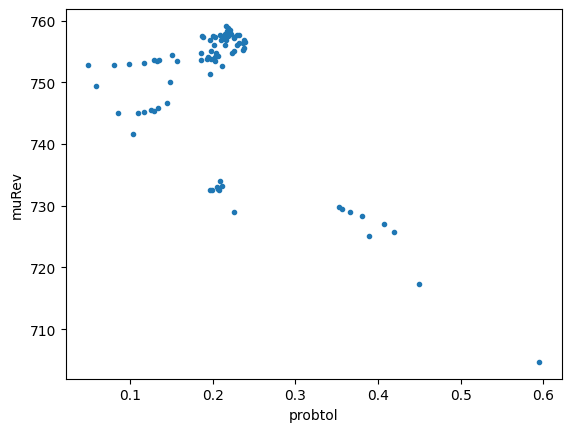

In [ ]:
plt.plot(probtol, muRev, '.')
plt.xlabel('probtol')
plt.ylabel('muRev')

Text(0, 0.5, 'CVARq5')

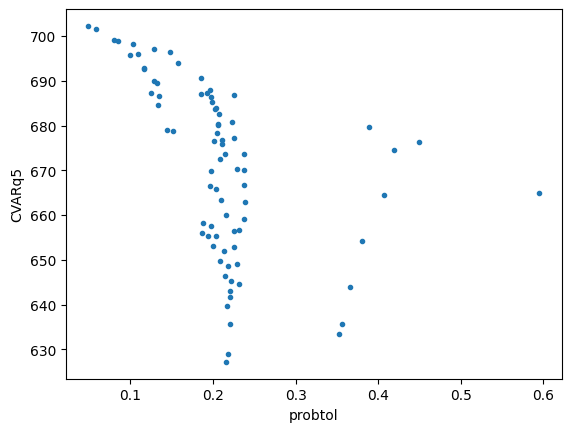

In [ ]:
plt.plot(probtol, CVARq5, '.')
plt.xlabel('probtol')
plt.ylabel('CVARq5')

In [ ]:
print(np.where((probtol < 0.1) & (CVARq5 > 690)))
print(muRev[np.where((probtol < 0.1) & (CVARq5 > 690))])

(array([11, 19, 20, 21, 22]),)
[745.07094893 749.39671069 752.88336608 752.86748386 752.93481815]


,muRev
count,81.000000
mean,748.720741
std,11.810996
min,704.682289
25%,745.122401
50%,753.821815
75%,756.878282
max,759.157856


In [ ]:
put_grid.iloc[np.where((probtol < 0.1) & (CVARq5 > 690))]

,kDM,cDM,kBP,cBP
11,0.64,0.020795,1.25,0.082645
19,0.65,0.032191,1.20,0.045046
20,0.64,0.020795,1.20,0.045046
21,0.63,0.017001,1.20,0.045046
22,0.62,0.013711,1.20,0.045046


# **Each option bought for 55.55556(i.e., 500/9)**

In [ ]:
def HedgeRevDM_base(deltaDM, DMfcst = 645, currentDM = 0.6513):
    return DMfcst * currentDM * (1+deltaDM / 100)

def HedgeRevDM_opt(nDM, kDM, cDM, deltaDM, DMfcst = 645, currentDM = 0.6513):
    return nDM * (max(kDM - currentDM * (1+deltaDM / 100), 0) - cDM)

def HedgeRevBP_base(deltaBP, BPfcst = 272, currentBP = 1.234):
    return BPfcst * currentBP * (1+deltaBP / 100)

def HedgeRevBP_opt(nBP, kBP, cBP, deltaBP, BPfcst = 272, currentBP = 1.234):
    return nBP * (max(kBP - currentBP * (1+deltaBP / 100), 0) - cBP)

In [ ]:
revUS_base = np.zeros(S)
revUS_opt = np.zeros((S, len(putDM)))

for s in range(S):
    DMtoUS_base_s = HedgeRevDM_base(deltaDM = ExRate[s, 0])
    BPtoUS_base_s = HedgeRevBP_base(deltaBP = ExRate[s, 1])
    revUS_base[s] = DMtoUS_base_s + BPtoUS_base_s

In [ ]:
for i in range(len(putDM)):
    revUS_opt_temp = np.zeros(S)

    for s in range(S):
        DMtoUS_opt_s = HedgeRevDM_opt(nDM = 500 / len(putDM),
                                    kDM = putDM['kDM'][i],
                                    cDM = putDM['cDM'][i],
                                    deltaDM = ExRate[s, 0])
        BPtoUS_opt_s = HedgeRevBP_opt(nBP = 500 / len(putBP),
                                    kBP = putBP['kBP'][i],
                                    cBP = putBP['cBP'][i],
                                    deltaBP = ExRate[s, 1])
        revUS_opt_temp[s] = DMtoUS_opt_s + BPtoUS_opt_s
    revUS_opt[:, i] = revUS_opt_temp
    print(i)

0
1
2
3
4
5
6
7
8


In [ ]:
revUS_equal = np.sum(revUS_opt, axis=1) + revUS_base
len(revUS_equal)

1000

In [ ]:
temp_q5 = np.quantile(revUS_equal, 0.05)
print(np.mean(revUS_equal[np.where(revUS_equal < temp_q5)]))
print(np.mean(revUS_equal))
print(sum(revUS_equal < bottomlineRev) / S)

686.5306173860183
748.7207408445486
0.208


# **Expand put options**

In [ ]:
nDM_opt = [100, 300, 500]
nBP_opt = [100, 300, 500]

In [ ]:
nDM, nBP = np.meshgrid(nDM_opt, nBP_opt)
n_opt = pd.DataFrame({'nDM': nDM.flatten(),
                    'nBP': nBP.flatten()})

In [ ]:
n_opt

,nDM,nBP
0,100,100
1,300,100
2,500,100
3,100,300
4,300,300
5,500,300
6,100,500
7,300,500
8,500,500


In [ ]:
put_grid_ii = pd.DataFrame()
for j in range(len(n_opt)):
    put_grid_temp = put_grid
    put_grid_temp['nDM'] = n_opt['nDM'][j]
    put_grid_temp['nBP'] = n_opt['nBP'][j]

    put_grid_ii = pd.concat([put_grid_ii, put_grid_temp])
put_grid_ii = put_grid_ii.reset_index(drop=True)

In [ ]:
put_grid_ii

,kDM,cDM,kBP,cBP,nDM,nBP
0,0.66,0.085855,1.3,0.137213,100,100
1,0.65,0.032191,1.3,0.137213,100,100
2,0.64,0.020795,1.3,0.137213,100,100
3,0.63,0.017001,1.3,0.137213,100,100
4,0.62,0.013711,1.3,0.137213,100,100
...,...,...,...,...,...,...
724,0.62,0.013711,0.9,0.000245,500,500
725,0.61,0.010851,0.9,0.000245,500,500
726,0.60,0.008388,0.9,0.000245,500,500
727,0.59,0.006291,0.9,0.000245,500,500


In [ ]:
CVARq5 = np.zeros(len(put_grid_ii))
muRev = np.zeros(len(put_grid_ii))
sigRev = np.zeros(len(put_grid_ii))
bottomlineRev = 706
probtol = np.zeros(len(put_grid_ii))

In [ ]:
for i in range(len(put_grid_ii)):
    revUS_temp = np.zeros(S)

    for s in range(S):
        DMtoUS_s = HedgeRevDM(nDM = put_grid_ii['nDM'][i],
                            kDM = put_grid_ii['kDM'][i],
                            cDM = put_grid_ii['cDM'][i],
                            deltaDM = ExRate[s, 0])
        BPtoUS_s = HedgeRevBP(nBP = put_grid_ii['nBP'][i],
                            kBP = put_grid_ii['kBP'][i],
                            cBP = put_grid_ii['cBP'][i],
                            deltaBP = ExRate[s, 1])
        revUS_temp[s] = DMtoUS_s + BPtoUS_s
    revUS_temp_q5 = np.quantile(revUS_temp, 0.05)
    CVARq5[i] = np.mean(revUS_temp[np.where(revUS_temp < revUS_temp_q5)])
    muRev[i] = np.mean(revUS_temp)
    sigRev[i] = np.std(revUS_temp)
    probtol[i] = np.sum(revUS_temp < bottomlineRev) / S
    # print(i)

print('max CVARq5 index:', np.where(CVARq5 == max(CVARq5))[0][0])
print('max muRev index:', np.where(muRev == max(muRev))[0][0])
print('min sigRev index:', np.where(sigRev == min(sigRev))[0][0])
print('min probtol index:', np.where(probtol == min(probtol))[0][0])

print(put_grid_ii.iloc[np.where(CVARq5 == max(CVARq5))])
print(put_grid_ii.iloc[np.where(muRev == max(muRev))])

max CVARq5 index: 416
max muRev index: 80
min sigRev index: 648
min probtol index: 416
      kDM       cDM   kBP       cBP  nDM  nBP
416  0.64  0.020795  1.25  0.082645  500  300
     kDM       cDM  kBP       cBP  nDM  nBP
80  0.55  0.001401  0.9  0.000245  100  100


In [ ]:
pd.DataFrame({'muRev': muRev}).describe()

,muRev
count,729.000000
mean,752.985560
std,8.396064
min,704.682289
25%,752.839489
50%,756.424284
75%,758.098612
max,759.337802


Text(0, 0.5, 'muRev')

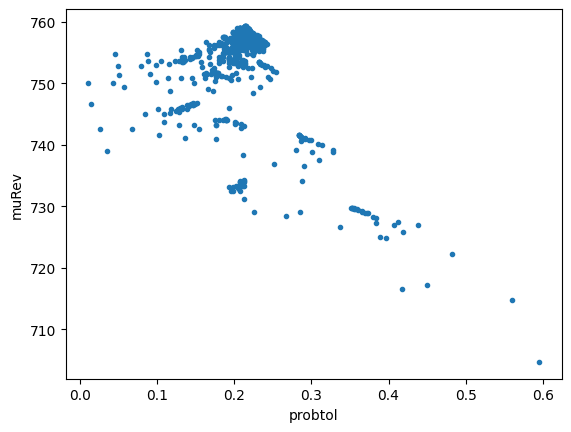

In [ ]:
plt.plot(probtol, muRev, '.')
plt.xlabel('probtol')
plt.ylabel('muRev')

Text(0, 0.5, 'CVARq5')

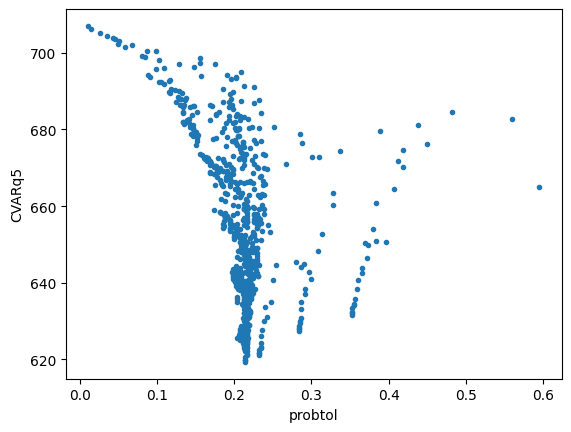

In [ ]:
plt.plot(probtol, CVARq5, '.')
plt.xlabel('probtol')
plt.ylabel('CVARq5')

In [ ]:
print(np.where((probtol < 0.05) & (CVARq5 > 700)))
print(muRev[np.where((probtol < 0.05) & (CVARq5 > 700))])

(array([406, 407, 415, 416, 417, 425, 668]),)
[739.05008116 742.53673655 746.59745008 750.08410547 750.06822325
 754.77155575 752.88336608]


In [ ]:
put_grid_ii.iloc[np.where((probtol < 0.05) & (CVARq5 > 700))]

,kDM,cDM,kBP,cBP,nDM,nBP
406,0.65,0.032191,1.30,0.137213,500,300
407,0.64,0.020795,1.30,0.137213,500,300
415,0.65,0.032191,1.25,0.082645,500,300
416,0.64,0.020795,1.25,0.082645,500,300
417,0.63,0.017001,1.25,0.082645,500,300
425,0.64,0.020795,1.20,0.045046,500,300
668,0.64,0.020795,1.20,0.045046,500,500


# **Ignoring stochastic dependence**

In [ ]:
np.random.seed(9527)
ExRate_Ind = np.array([np.random.normal(mu_est[0], sigmaDM, S),
            np.random.normal(mu_est[1], sigmaBP, S)]).T
np.corrcoef(ExRate_Ind[:, 0], ExRate_Ind[:, 1])[0, 1]

In [ ]:
CVARq5_Ind = np.zeros(len(put_grid))
muRev_Ind = np.zeros(len(put_grid))
sigRev_Ind = np.zeros(len(put_grid))
bottomlineRev = 706
probtol_Ind = np.zeros(len(put_grid))

In [ ]:
for i in range(len(put_grid)):
    revUS_temp = np.zeros(S)

    for s in range(S):
        DMtoUS_s = HedgeRevDM(nDM = 500,
                            kDM = put_grid['kDM'][i],
                            cDM = put_grid['cDM'][i],
                            deltaDM = ExRate_Ind[s, 0])
        BPtoUS_s = HedgeRevBP(nBP = 500,
                            kBP = put_grid['kBP'][i],
                            cBP = put_grid['cBP'][i],
                            deltaBP = ExRate_Ind[s, 1])
        revUS_temp[s] = DMtoUS_s + BPtoUS_s
    revUS_temp_q5 = np.quantile(revUS_temp, 0.05)
    CVARq5_Ind[i] = np.mean(revUS_temp[np.where(revUS_temp < revUS_temp_q5)])
    muRev_Ind[i] = np.mean(revUS_temp)
    sigRev_Ind[i] = np.std(revUS_temp)
    probtol_Ind[i] = np.sum(revUS_temp < bottomlineRev) / S
    print(i)

print('max CVARq5 index:', np.where(CVARq5_Ind == max(CVARq5_Ind))[0][0])
print('max muRev index:', np.where(muRev_Ind == max(muRev_Ind))[0][0])
print('min sigRev index:', np.where(sigRev_Ind == min(sigRev_Ind))[0][0])
print('min probtol index:', np.where(probtol_Ind == min(probtol_Ind))[0][0])